### 1.1 Swiss Role Dataset

(3000, 3)


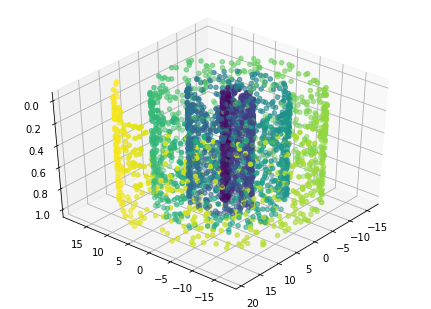

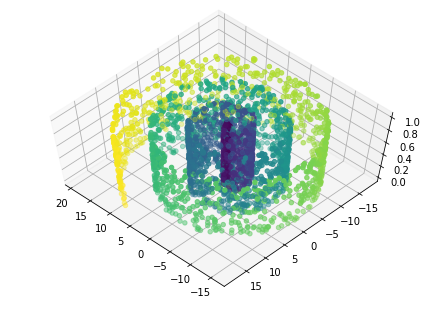

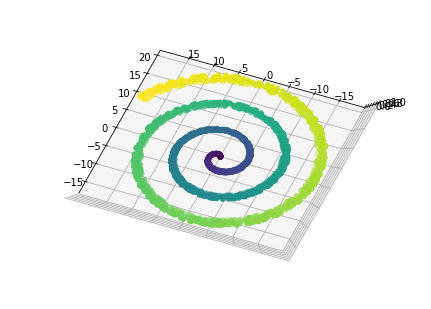

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# import plotly.plotly as py
%matplotlib inline

#generate random vectors
u = np.random.uniform(0,20,3000)
v = np.random.uniform(0,1,3000)

#3D embedding
x = u*np.cos(u)
y = u*np.sin(u)
z = v
data_SR = np.array((x, y, z), dtype=float).transpose() #added python3
extra_feat_1 = u+v #added python3
extra_feat_2 = u-v #added python3
data_SR_ext = np.array((x, y, z, extra_feat_1, extra_feat_2), dtype=float).transpose() #added python3
print(data_SR.shape)
#color vector
color = u/max(u)

#ploting 3D
fig3 = plt.figure()
plt.clf()
ax3 = Axes3D(fig3, rect=[0, 0, .95, 1], elev=320, azim=320)
plt.cla()
ax3.scatter(x, y, z, c=color)
plt.show()

fig1 = plt.figure()
plt.clf()
ax1 = Axes3D(fig1, rect=[0, 0, .95, 1], elev=65, azim=134)
plt.cla()
ax1.scatter(x, y, z, c=color)
plt.show()

fig2 = plt.figure()
plt.clf()
ax2 = Axes3D(fig2, rect=[0, 0, .95, 1], elev=90, azim=200)
plt.cla()
ax2.scatter(x, y, z, c=color)
plt.show()

1.1.3 

since the data is constructed from 2 vectors of dimension nX1, its intrinsic dimention is 2. Since the transformation keeps v, but transforms u to polar cordinates, we get that after transformation, data's dimention is 3.

### 1.2 Face Dataset

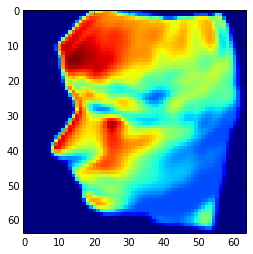

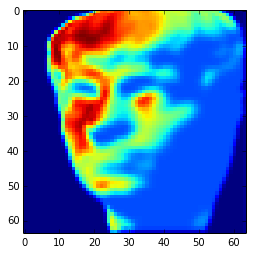

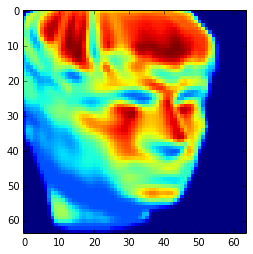

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

%matplotlib inline

data = sio.loadmat('./face_data.mat')
images = data['images']

imm1 = np.rot90(np.reshape(images.T[5],(64,64))*255,k=3)
plt.imshow(imm1, interpolation='nearest')
plt.show()

imm2 = np.rot90(np.reshape(images.T[1],(64,64))*255,k=3)
plt.imshow(imm2, interpolation='nearest')
plt.show()

imm3 = np.rot90(np.reshape(images.T[2],(64,64))*255,k=3)
plt.imshow(imm3, interpolation='nearest')
plt.show()

1.2.3 

since the data is constructed from 2 vectors of dimension nX1, its intrinsic dimention is 2. Since the transformation keeps v, but transforms u to polar cordinates, we get that after transformation, data's dimention is 3.

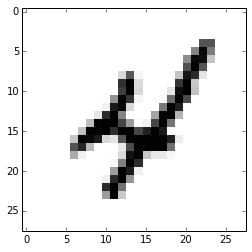

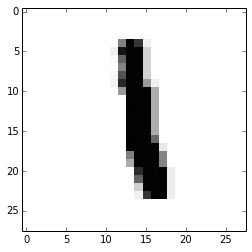

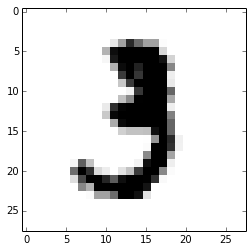

In [131]:
import pickle, gzip
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

f = gzip.open('./mnist.pkl.gz','rb')
train_set, valid_set,test_set = pickle.load(f)
f.close()
train_set_images = train_set[0]
train_set_images = train_set_images.T
train_set_digit_number = train_set[1]
# print(np.shape(train_set_images))
mnist = train_set_images.T[train_set_digit_number <6].T
# mnist.shape

imm1 = np.rot90(np.reshape(mnist.T[8],(28,28))*255,k=0)
plt.imshow(imm1, cmap='Greys', interpolation='nearest')
plt.show()

imm2 = np.rot90(np.reshape(mnist.T[5],(28,28))*255,k=0)
plt.imshow(imm2, cmap='Greys', interpolation='nearest')
plt.show()

imm3 = np.rot90(np.reshape(mnist.T[9],(28,28))*255,k=0)
plt.imshow(imm3, cmap='Greys', interpolation='nearest')
plt.show()

1.3.3 

since the data is constructed from 2 vectors of dimension nX1, its intrinsic dimention is 2. Since the transformation keeps v, but transforms u to polar cordinates, we get that after transformation, data's dimention is 3.

[ 0.54520155  0.45416533]
data_SR_pca shape is:(3000, 2)
data_SR_kpca shape is:(3000, 2)
[ 0.41682074  0.33335866]
data_SR_ext_pca shape is:(3000, 2)


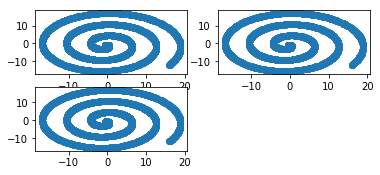

In [33]:
#Q2 #python3
#Q2.1 #python3
from sklearn.decomposition import PCA, KernelPCA
d = 2
#Q2.1.1 #python3
#Q2.1.1.1 #python3
pca = PCA(n_components = d)
pca.fit(data_SR)
PCA(copy=True, iterated_power='auto', n_components=d, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
data_SR_pca = pca.transform(data_SR)
print('data_SR_pca shape is:' + str(data_SR_pca.shape))
plt.subplot(321)
plt.scatter(data_SR_pca[:,0], data_SR_pca[:,1])
#Q2.1.1.2 #python3
kpca = KernelPCA(n_components = d)
kpca.fit(data_SR)
kpca = KernelPCA(n_components = d, kernel='rbf')
data_SR_kpca = pca.transform(data_SR)
print('data_SR_kpca shape is:' + str(data_SR_kpca.shape))
plt.subplot(322)
plt.scatter(data_SR_kpca[:,0], data_SR_kpca[:,1])

#Q2.1.1.3 #python3
pca = PCA(n_components = d)
pca.fit(data_SR_ext)
PCA(copy=True, iterated_power='auto', n_components=d, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
print(pca.explained_variance_ratio_)  
data_SR_ext_pca = pca.transform(data_SR_ext)
print('data_SR_ext_pca shape is:' + str(data_SR_ext_pca.shape))
plt.subplot(323)
plt.scatter(data_SR_pca[:,0], data_SR_pca[:,1])
